# Chapter 4: More Estimation
___

Table of contents:

1. [The Euro Problem](#euro)
2. [Summarizing the Posterior](#summarize)
3. [Swamping the priors](#swamp)
2. [Optimization](#opt)
2. [The Beta Distribution](#beta)

In [45]:
# I import the abstract type that I defined in notebook 2:
from think_bayes_modified import Suite, percentile, credible_interval

import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. The Euro Problem  <a id="euro"></a>

When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. ‘It looks very suspicious to me,’ said Barry Blight, a statistics lecturer at the London School of Economics. ‘If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.

But do these data give evidence that the coin is biased rather than fair?

To answer that question, we’ll proceed in two steps:
1. **Estimate the probability** that the coin lands face up.
2. Evaluate whether the **data support the hypothesis** that the coin is biased. (a little harder, dealt with in the next chapter)

Any given coin has some probability, x, of landing heads up when spun on edge. It seems reasonable to believe that the value of x depends on some physical characteristics of the coin, primarily the distribution of weight.

If a coin is perfectly balanced, we expect x to be close to 50%, but for a lopsided coin, x might be substantially different. We can use Bayes’s theorem and the observed data to estimate x.

Let’s define 101 hypotheses, where $H_x$ is the hypothesis that the probability of heads is $ x $ %, for values from 0 to 100. I’ll start with a uniform prior where the probability of Hx is the same for all x. We’ll come back later to consider other priors.

The likelihood function is relatively easy: If $H_x$ is true, the probability of heads is $ x / 100 $ and the probability of tails is $ 1 − x/100 $.

We define a class that has this likelihood in it. At first, we do not pay much attention to the appropriateness of the data structure used to represent head and tails, but later we will make some improvements to this implementation.

In [14]:
class Euro(Suite):
    """ class for the Euro problem """
    def Likelihood(self, data, hypo):
        x = hypo
        if data == 'H':  # heads
            return x / 100.0
        else:            # tails
            return 1 - x / 100.0

In [15]:
# after some coin tosses, I get these. I want to find out whether or not the coin is fair.
num_heads = 140
num_tails = 110

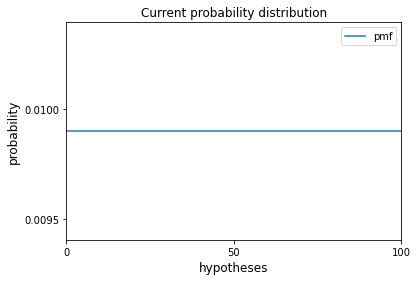

In [25]:
hypotheses = range(0, 101)  # I consider 100 hypotheses, where H_i means that I assume P(H) = x %
suite = Euro(hypotheses)  # my prior will be uniform, and thus I start believing the coin is fair

coin_flips = ['H'] * num_heads + ['T'] * num_tails
shuffle(coin_flips)  # in-place random mixing

suite.PlotProb();

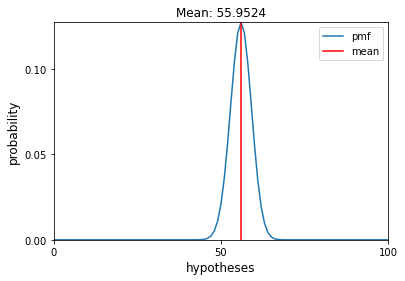

In [26]:
# update my prior witll all the observed coin flips
for flip in coin_flips:
    suite.Update(flip)
    
suite.PlotMean()

### 2. Summarizing the Posterior  <a id="summarize"></a>

Of course, there are several ways to summarize the posterior distribution. One option is to find the **most likely value in the posterior distribution**:

In [29]:
def max_likelihood(pmf):
    """Returns the value with the highest probability."""
    prob, val = max((prob, val) for val, prob in pmf.Items())
    return val

In [40]:
print("Max likelihood estimate is", max_likelihood(suite))
print(f"Proportion of heads is {num_heads} / ({num_tails} + {num_heads}), which coincides with "
      f"{num_heads * 100 / (num_heads + num_tails):.2f}%")

Max likelihood estimate is 56
Proportion of heads is 140 / (110 + 140), which coincides with 56.00%


In this case the result, 56, is also the observed percentage of heads, 140/250 = 56%. So that suggests (correctly) that the observed percentage is the maximum likelihood estimator for the population.

We might also summarize the posterior by computing the mean and median:

In [47]:
mean = suite.Mean()
median = percentile(suite, 50)
CI_90 = credible_interval(suite, percentage=90)

print(f"Mean: {mean:0.2f}")
print(f"median: {median}")
print(f"90%-CI: {CI_90}")

Mean: 55.95
median: 56
90%-CI: (51, 61)


Now, getting back to the original question, **we would like to know whether the coin is fair**. 

We observe that <font color="red"> the posterior credible interval does not include 50%, </font> which suggests that the coin is not fair. 

But ... <font color="red"> Does that **really** suggest that?</font>, or are we in state of confusion, mistaking _credible intervals_ for **reasonable evidence**?

Indeed we are, since with a CI we are not answering _exactly the question we started with_. We asked:
> "Do these data give evidence that the coin is biased rather than fair?" 

To answer that question, we will have to be more precise about what **it means to say that data constitute evidence for a hypothesis**. And that is the subject of the [next chapter](05_odds_and_addends.ipynb).

But before we go on, let's address one possible source of confusion. Since we want to know whether the coin is fair, it might be tempting to ask for the probability that x is 50%, right?

In [50]:
suite.Prob(50)

0.02097652612954467

The problem is that this 0.021, is almost **meaningless**. The decision to evaluate 101 hypotheses was arbitrary; we could have divided the range into more or fewer pieces, with the probability for any given hypothesis being greater or lower, respectively, depending on that chosen number.

### 3. Swamping the priors  <a id="swamp"></a>

### 3. Optimization  <a id="opt"></a>

### 3. The Beta Distribution  <a id="beta"></a>